In this notebook, I will explore some APIs to makesure those APIs are useful to our project.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Google Trends API: Pytrends

### rate limit

One user reports that 1,400 sequential requests of a 4 hours timeframe got them to the limit. (Replicated on 2 networks)
It has been tested, and 60 seconds of sleep between requests (successful or not) appears to be the correct amount once you reach the limit.

In [2]:
# link for this API:
#     https://pypi.org/project/pytrends/#API

# connect to Google
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz = 360) 
    # hl is the language setting
    # tz is the Timezone Offset

# potential ways to break the rate limitation
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25) \
#  ,proxies=['https://34.203.233.13:80',], retries=2,\
#  backoff_factor=0.1, requests_args={'verify':False})

### Visualization & find the city/state with greatest passion

Text(0.5, 1.0, 'Interest over time of United State')

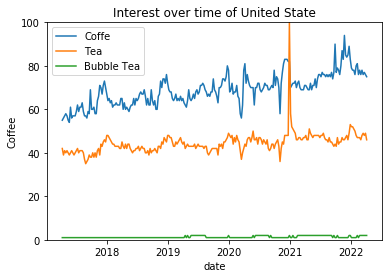

In [47]:
# interest over time of United States.
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
result = pytrends.interest_over_time() 
# visualize trends
sns.lineplot(x=result.index, y=result["Coffee"]) 
sns.lineplot(x=result.index, y=result["Tea"]) 
sns.lineplot(x=result.index, y=result["bubble tea"])
ax.set(ylabel='Relative searhing index')
plt.legend(labels=["Coffe","Tea","Bubble Tea"])
plt.ylim(0, 100)
plt.title('Interest over time of United State')

In [32]:
kw_list = ['Coffee','Tea','bubble tea'] # maximum 5 words
topl = []
# find the top states
for i in range(len(kw_list)):
    pytrends.build_payload([kw_list[i]], cat=0, timeframe='today 5-y', geo='US', gprop='')
    InterestByRegion = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
    InterestByRegion = InterestByRegion.reset_index()
    InterestByRegion = InterestByRegion.sort_values(by=[kw_list[i]],ascending = False)
    topl.append([item for item in InterestByRegion.iloc[:5,:1]['geoName']])
    #print(topl[i])
intersec = list(set(topl[0]) & set(topl[1]) & set(topl[2])) 
rankdic = {}
for item in intersec:
    for i in range(len(topl)):
        if item not in rankdic:
            rankdic[item] = 0
        rankdic[item] += topl[i].index(item) 
rankdic = dict(sorted(rankdic.items(), key=lambda item: item[1]))
print(f'The state with highest interest is {list(rankdic.keys())[0]}.')

The state with highest interest is Oregon.


Text(0.5, 1.0, 'Interest over time of Oregon State')

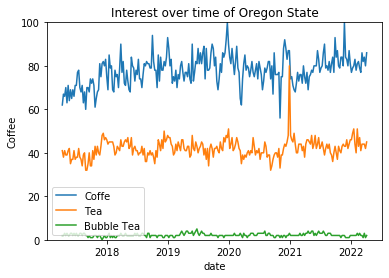

In [44]:
# interest over time of Oregon state.
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US-OR', gprop='')
result = pytrends.interest_over_time() 
# visualize trends
sns.lineplot(x=result.index, y=result["Coffee"]) 
sns.lineplot(x=result.index, y=result["Tea"]) 
sns.lineplot(x=result.index, y=result["bubble tea"])
ax.set(ylabel='Relative searhing index')
plt.legend(labels=["Coffe","Tea","Bubble Tea"])
plt.ylim(0, 100)
plt.title('Interest over time of Oregon State')

In [22]:
# find top city
topcity = []
for j in range(len(kw_list)):
    pytrends.build_payload([kw_list[j]], cat=0, timeframe='today 5-y', geo='US-OR', gprop='')
    InterestByRegion = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
    InterestByRegion = InterestByRegion.reset_index()
    InterestByRegion = InterestByRegion.sort_values(by=[kw_list[j]],ascending = False)
    topcity.append([item for item in InterestByRegion.iloc[:5,:1]['geoName']])
    #print(topcity[j])
intersec = list(set(topcity[0]) & set(topcity[1]) & set(topcity[2]))
rankdic = {}
for item in intersec:
    for i in range(len(topcity)):
        if item not in rankdic:
            rankdic[item] = 0
        rankdic[item] += topcity[i].index(item) 
rankdic = dict(sorted(rankdic.items(), key=lambda item: item[1]))
print(f'The city with highest interest is {list(rankdic.keys())[0]}.')

The city with highest interest is Portland OR.


# -----------------------------------------------------------------------------------------

### Some other functions

In [53]:
# search for real time trends
pytrends.trending_searches(pn='united_states').head()

,0
0,Dwayne Haskins
1,Scottie Scheffler
2,UFC 273
3,PSG
4,Ryan Garcia


In [57]:
# The top trends in past year?
pytrends.top_charts('2021', hl='en-US', tz=300, geo='GLOBAL')

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [52]:
# suggestions words for searching
pytrends.suggestions(keyword = 'coffee')
    # return a list of dicts

[{'mid': '/m/02vqfm', 'title': 'Coffee', 'type': 'Drink'},
 {'mid': '/g/1q6j5bq4l', 'title': 'coffeemaker', 'type': 'Topic'},
 {'mid': '/m/07xyvk', 'title': 'Coffeemaker', 'type': 'Topic'},
 {'mid': '/m/020fb2', 'title': 'Cafe', 'type': 'Topic'},
 {'mid': '/m/05bzrs', 'title': 'Coffee bean', 'type': 'Topic'}]

In [55]:
pytrends.categories()

{'children': [{'children': [{'name': 'Celebrities & Entertainment News',
     'id': 184},
    {'children': [{'name': 'Animated Films', 'id': 1104},
      {'name': 'Anime & Manga', 'id': 317},
      {'name': 'Cartoons', 'id': 319},
      {'name': 'Comics', 'id': 318}],
     'name': 'Comics & Animation',
     'id': 316},
    {'children': [{'children': [{'name': 'Film & TV Awards', 'id': 1108},
        {'name': 'Film & TV Production', 'id': 1117}],
       'name': 'Film & TV Industry',
       'id': 1116},
      {'children': [{'name': 'Music Awards', 'id': 1113},
        {'name': 'Record Labels', 'id': 1114}],
       'name': 'Recording Industry',
       'id': 1115}],
     'name': 'Entertainment Industry',
     'id': 612},
    {'children': [{'name': 'Clubs & Nightlife', 'id': 188},
      {'name': 'Concerts & Music Festivals', 'id': 891},
      {'name': 'Film Festivals', 'id': 1086},
      {'name': 'Live Sporting Events', 'id': 1273},
      {'name': 'Movie Listings & Theater Showtimes', 'id':